Elijo año y creo la carpeta. Luna esto en Windowns no sé si anda. Usá os.path.join o borrá la linea que crea. 

In [1]:
year = 2018
path = f'../figs/positive_graphs/periodos/{year}_{year+1}'
import os
if not os.path.exists(path):
    os.makedirs(path)

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
from procesador_votaciones import ProcesadorDeVotaciones
from heavy_graph_maker import HeavyGraphMaker
from new_disparity_filter import NewDisparityFilter

In [4]:
procesador = ProcesadorDeVotaciones(year, year +1, 'data')
congreso = procesador.procesar()
congreso.validate()

Loading from data/2018/1
Loading from data/2018/2
Loading from data/2018/3
Loading from data/2018/4
Loading from data/2018/5
Loading from data/2018/6
Loading from data/2018/7
Loading from data/2018/8
Loading from data/2018/9
Loading from data/2018/10
Loading from data/2018/11
Loading from data/2018/12
Loading from data/2019/1
Loading from data/2019/2
Loading from data/2019/3
Loading from data/2019/4
Loading from data/2019/5
Loading from data/2019/6
Loading from data/2019/7
Loading from data/2019/8
Loading from data/2019/9
Loading from data/2019/10
Loading from data/2019/11
Loading from data/2019/12
Changing vote 3952 in 2019 to 2020
Changing vote 3958 in 2019 to 2020
Changing vote 3942 in 2019 to 2020
Changing vote 3947 in 2019 to 2020
Changing vote 3953 in 2019 to 2020
Changing vote 3954 in 2019 to 2020
Changing vote 3936 in 2019 to 2020
Changing vote 3935 in 2019 to 2020
Changing vote 3950 in 2019 to 2020
Changing vote 3945 in 2019 to 2020
Changing vote 3948 in 2019 to 2020
Changing 

In [5]:
maker = HeavyGraphMaker(congreso)
grafo = maker.create_year_network(year, positive = True)

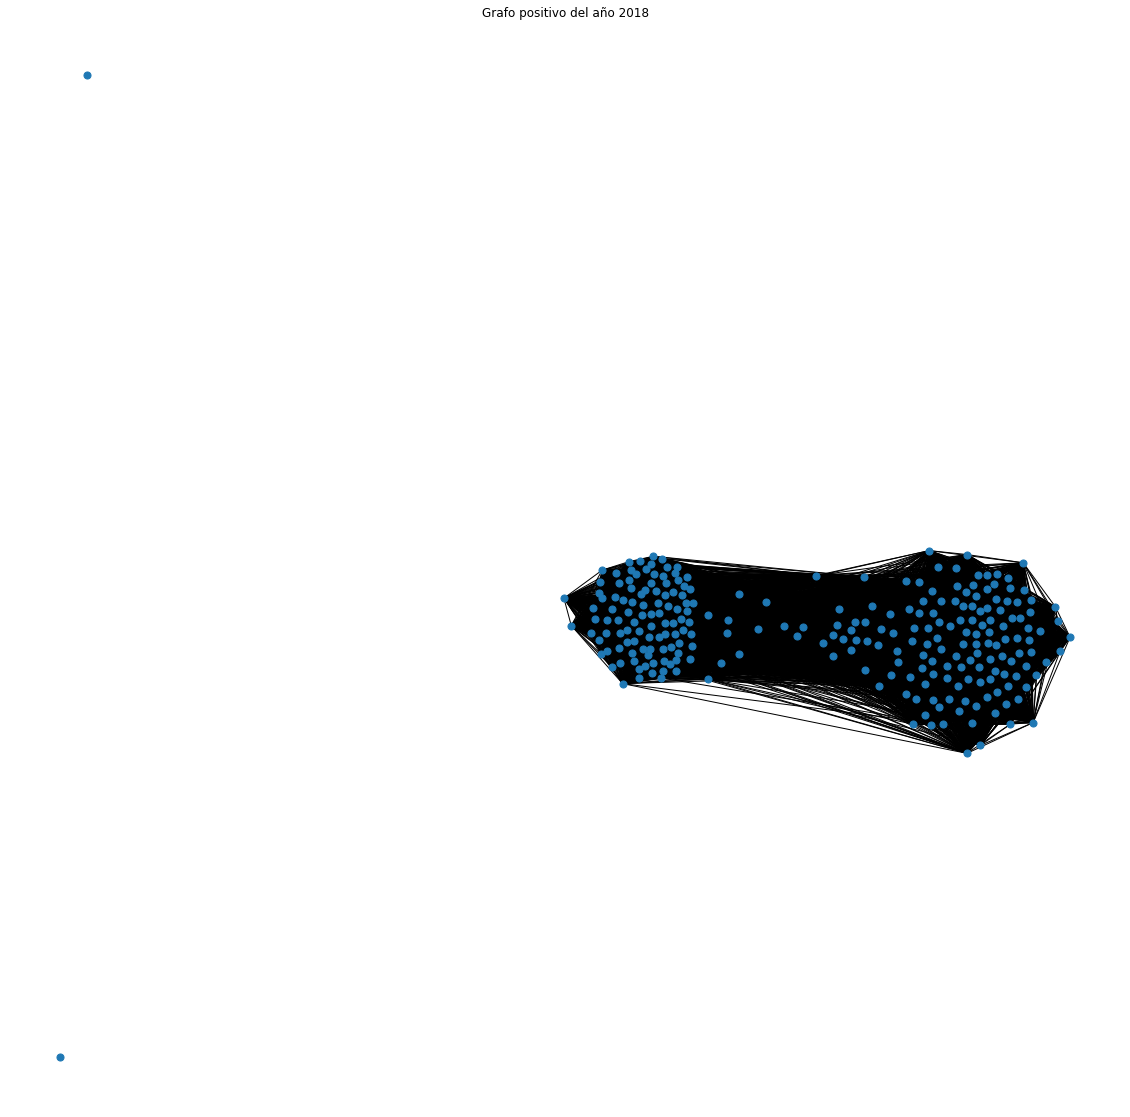

In [6]:
fig, axs = plt.subplots(1, 1, figsize = (20, 20))
nodos = grafo.get_nodes()
pos = nx.spring_layout(grafo.graph, k = 1)
ec = nx.draw_networkx_edges(grafo.graph, pos, alpha=1)
nc = nx.draw_networkx_nodes(grafo, pos, nodelist=nodos,
                        with_labels=False, node_size=50, cmap=plt.cm.jet)
axs.set_title(f'Grafo positivo del año {year}')
axs.axis('off')
plt.savefig(f'../figs/positive_graphs/periodos/{year}_{year+1}/grafo.jpg')
plt.show()

In [7]:
GC, _ = grafo.gigant_component()

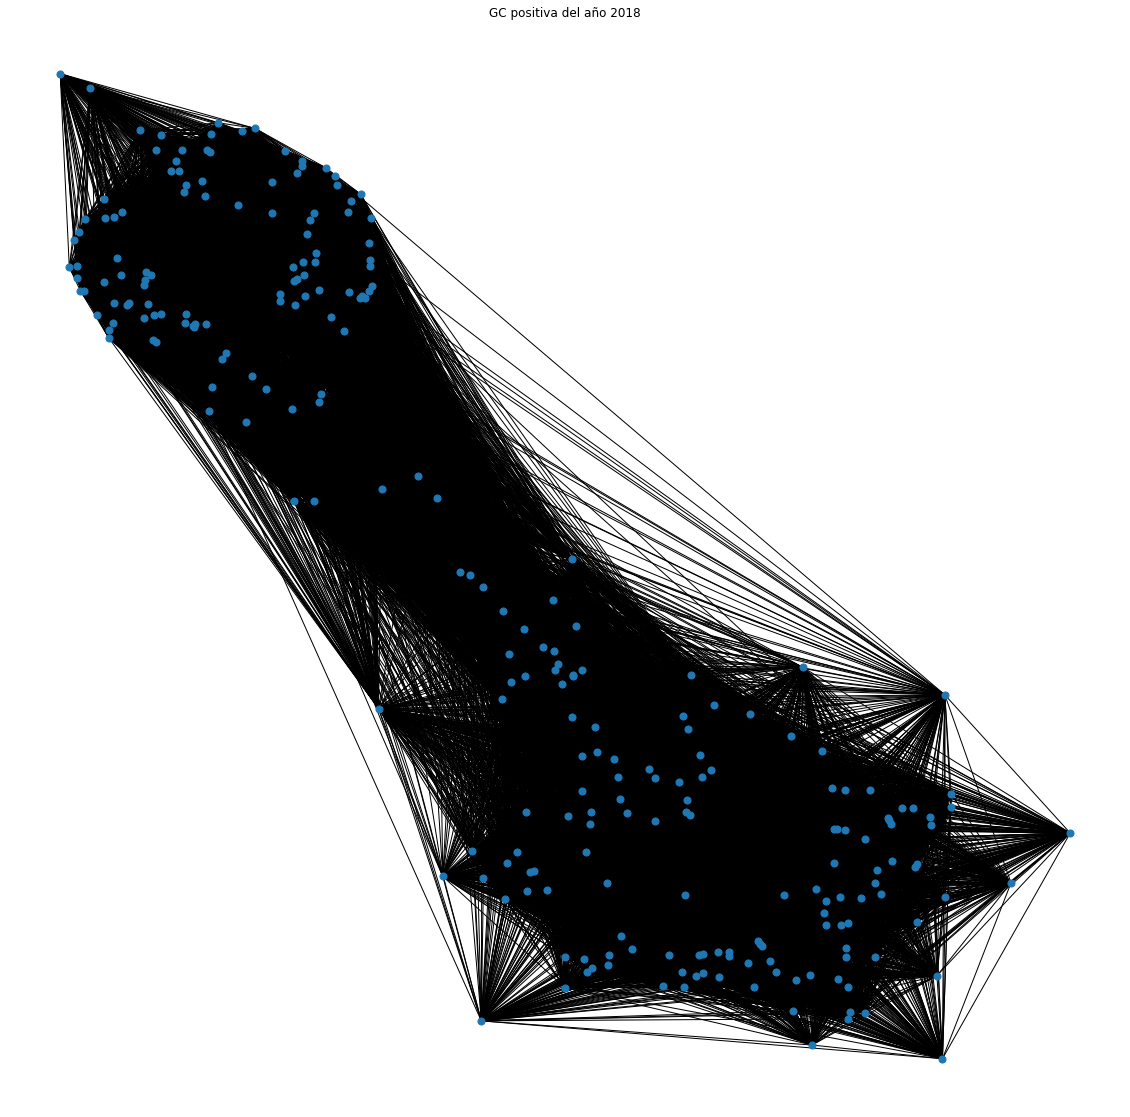

In [8]:
fig, axs = plt.subplots(1, 1, figsize = (20, 20))
nodos = GC.nodes()
pos = nx.spring_layout(GC)
ec = nx.draw_networkx_edges(GC, pos, alpha=1)
nc = nx.draw_networkx_nodes(GC, pos, nodelist=nodos,
                        with_labels=False, node_size=50, cmap=plt.cm.jet)
axs.set_title(f'GC positiva del año {year}')
axs.axis('off')
plt.savefig(f'../figs/positive_graphs/periodos/{year}_{year+1}/GC.jpg')
plt.show()

In [9]:
print(f' El grafo tiene {len(grafo.get_edges())} enlaces')

 El grafo tiene 19799 enlaces


In [20]:
alpha = 0.07

In [21]:
copia = grafo.copy()
grafo_cortado = NewDisparityFilter(copia).alpha_cut(alpha_t = alpha)

The graph has 19799 edges
Max alpha is 0.23889053203377728, min alpha is 0.01713275937275201
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
Enlaces sacados: 15000
Enlaces sacados: 16000
16476 edges deleted, 3323 left
Gigant component is 0.9613899613899614 of the total


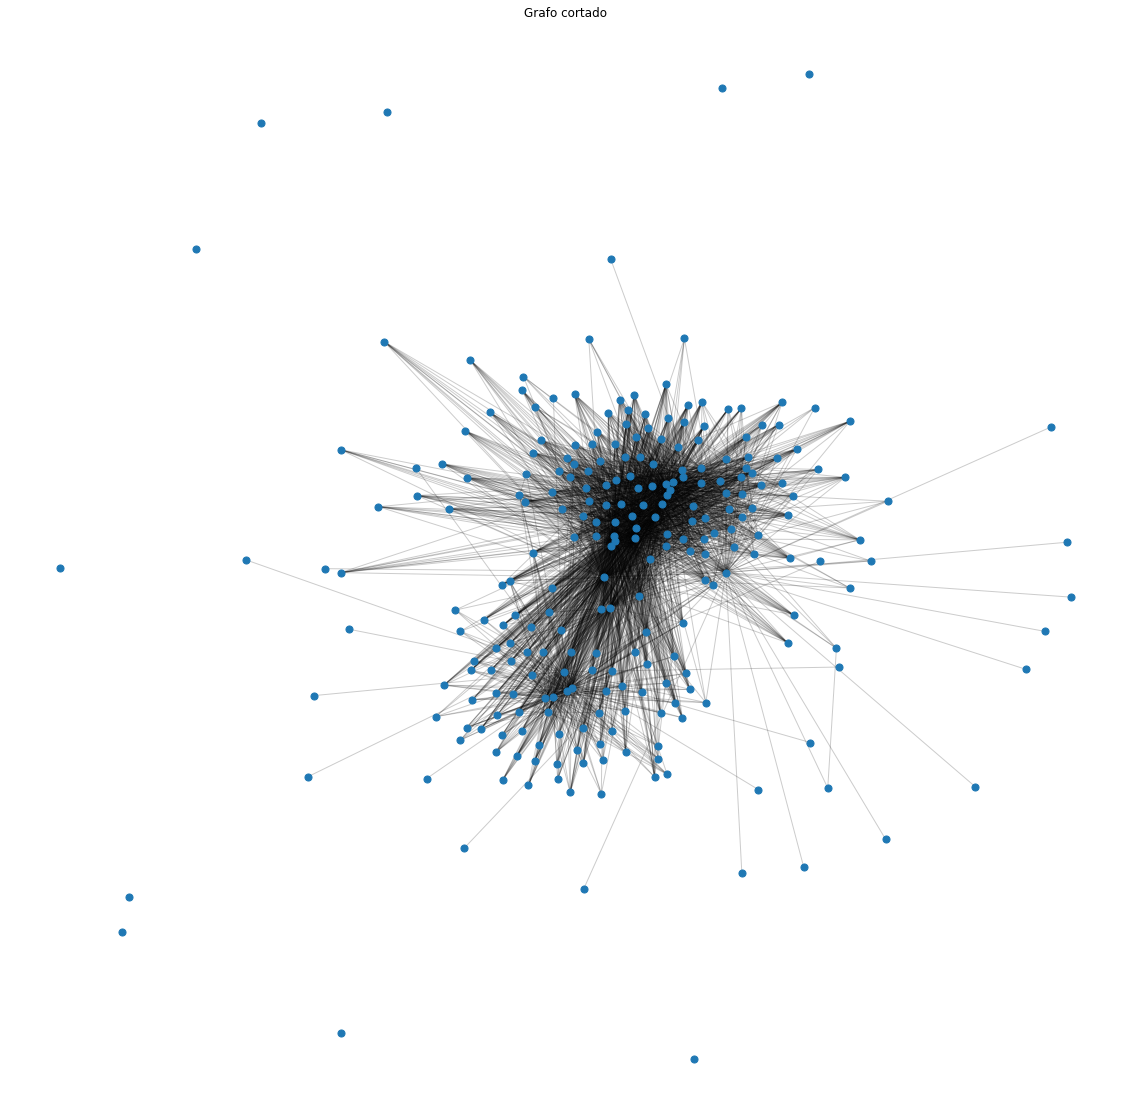

In [22]:
fig, axs = plt.subplots(1, 1, figsize = (20, 20))
nodos = grafo_cortado.get_nodes()
pos = nx.spring_layout(grafo_cortado.graph, k = 1)
ec = nx.draw_networkx_edges(grafo_cortado.graph, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(grafo_cortado, pos, nodelist=nodos,
                        with_labels=False, node_size=50, cmap=plt.cm.jet)
axs.set_title(f'Grafo cortado')
axs.axis('off')

plt.savefig(f'../figs/positive_graphs/periodos/{year}_{year+1}/cortado_alpha_{alpha}.jpg')
plt.show()

In [23]:
GC_cut, _ = grafo_cortado.gigant_component()

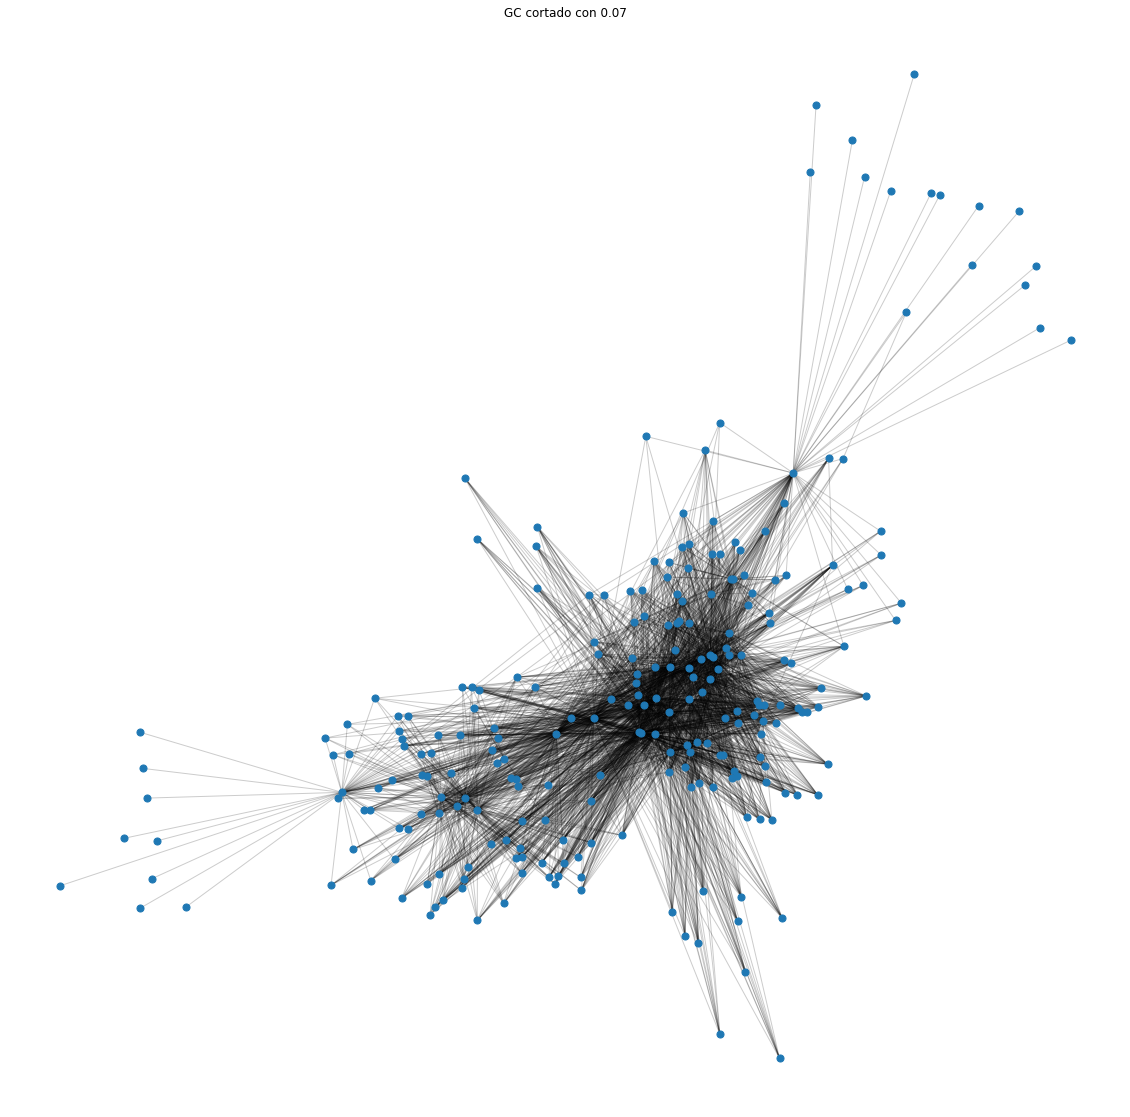

In [24]:
fig, axs = plt.subplots(1, 1, figsize = (20, 20))
nodos = GC_cut.nodes()
pos = nx.spring_layout(GC_cut)
ec = nx.draw_networkx_edges(GC_cut, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(GC_cut, pos, nodelist=nodos,
                        with_labels=False, node_size=50, cmap=plt.cm.jet)
axs.set_title(f'GC cortado con {alpha}')
axs.axis('off')

plt.savefig(f'../figs/positive_graphs/periodos/{year}_{year+1}/GC_cortada_alpha_{alpha}.jpg')
plt.show()